# **Import libraries**

In [8]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

# **Download dataset**

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YsgLBDqox6AeXjeo4mke")
project = rf.workspace("dsp391m").project("tomatoes-dataset-nv74f")
version = project.version(2)
dataset = version.download("coco")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tomatoes-dataset-2 in coco:: 100%|██████████| 1527/1527 [00:00<00:00, 1544.96it/s]


# **From JSON to Pandas Dataframe**

In [3]:
def dataset():
  with open('/content/tomatoes-dataset-2/train/_annotations.coco.json', 'r') as f:
    data = json.load(f)

  image_id = []
  category_id = []
  bbox = []
  area = []
  for i in data['annotations']:
    image_id.append(i['image_id'])
    category_id.append(i['category_id'])
    bbox.append(i['bbox'])
    area.append(i['area'])

  id = []
  file_name = []
  height = []
  width = []
  for i in data['images']:
    id.append(i['id'])
    file_name.append(i['file_name'])
    height.append(i['height'])
    width.append(i['width'])

  return pd.DataFrame({'image_id': image_id,
                       'category_id': category_id,
                       'bbox': bbox,
                       'area': area}), pd.DataFrame({'id': id,
                                                     'file_name': file_name,
                                                     'height': height,
                                                     'width': width}), data['categories']

annotation, image, categories = dataset()

# **EDA insights**

In [18]:
categories

[{'id': 0, 'name': 'harvestable-unharvestable', 'supercategory': 'none'},
 {'id': 1,
  'name': 'harvestable',
  'supercategory': 'harvestable-unharvestable'},
 {'id': 2, 'name': 'semi-ripe', 'supercategory': 'harvestable-unharvestable'},
 {'id': 3,
  'name': 'unharvestable',
  'supercategory': 'harvestable-unharvestable'}]

Text(0.5, 1.0, 'The class distribution')

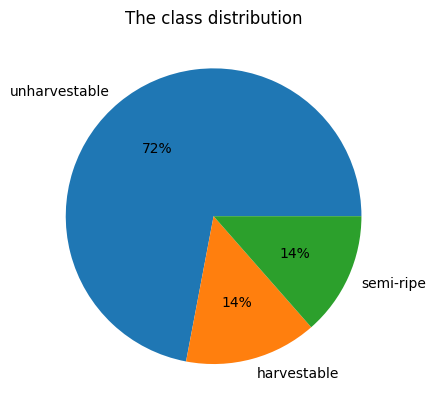

In [23]:
# Visualize the class distribution

classes = annotation['category_id'].value_counts()
plt.pie(list(classes),
        labels = ['unharvestable', 'harvestable', 'semi-ripe'],
        autopct = '%.0f%%')
plt.title('The class distribution')

[Text(0, 0.5, ''), Text(0.5, 0, 'The distribution of bounding box area')]

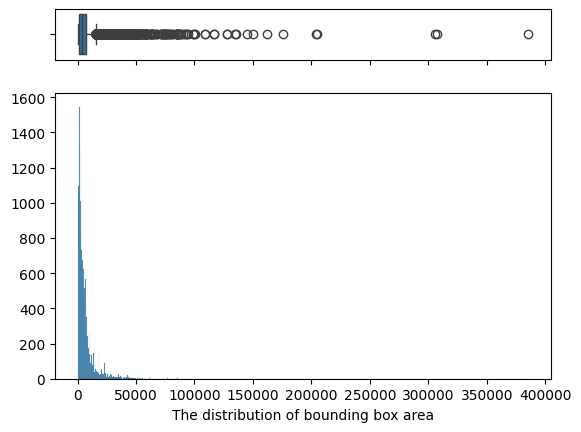

In [24]:
# Visualize a histogram and a boxplot for the bounding box area distribution

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x = annotation['area'], ax = ax_box)
sns.histplot(annotation['area'], ax = ax_hist)
ax_hist.set(ylabel = '', xlabel = 'The distribution of bounding box area')

[Text(0.5, 0, 'The distribution of the number of bounding boxes for each image')]

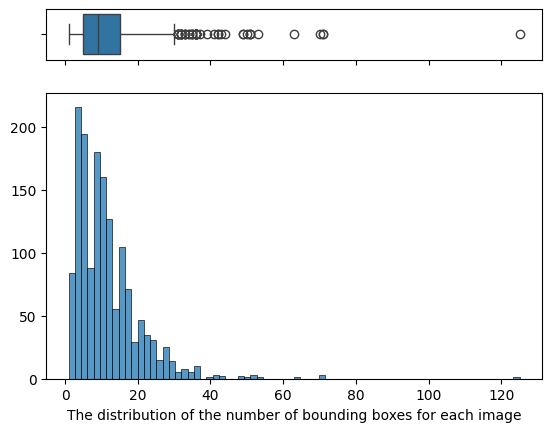

In [25]:
# Visualize a histogram and a boxplot for the distribution of the number of bounding boxes for each image

no_of_bbox = annotation.groupby(['image_id']).count()
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x = no_of_bbox['bbox'], ax = ax_box)
sns.histplot(no_of_bbox['bbox'], ax = ax_hist)
ax_hist.set(ylabel = '')
ax_hist.set(xlabel = 'The distribution of the number of bounding boxes for each image')

Text(0.5, 1.0, 'The distribution of the frequency of each type of tomato for each image')

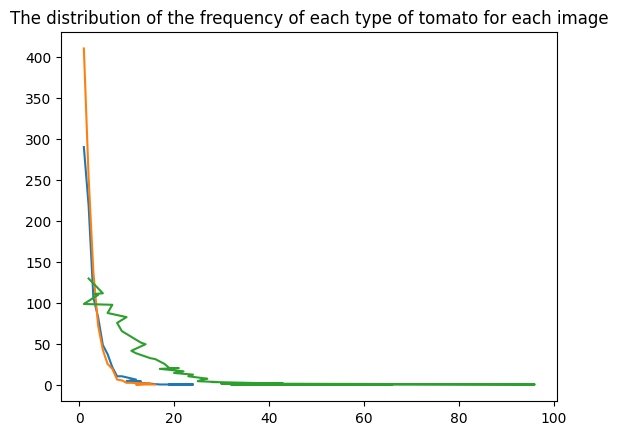

In [28]:
# Visualize the distribution of the frequency of each type of tomato for each image

fully_ripened = annotation[annotation['category_id'] == 1]
semi_ripened = annotation[annotation['category_id'] == 2]
green = annotation[annotation['category_id'] == 3]

plt.plot(fully_ripened.groupby('image_id').count()['bbox'].value_counts(), label = 'fully-riped')
plt.plot(semi_ripened.groupby('image_id').count()['bbox'].value_counts(), label = 'semi-riped')
plt.plot(green.groupby('image_id').count()['bbox'].value_counts(), label = 'green')
plt.title('The distribution of the frequency of each type of tomato for each image')

In [26]:
# How many images has no object?

answer = set((image['id'].unique())) - set(annotation['image_id'].unique())
print('- There are ', len(answer) ,' image/images has no object')
print('- Id images: ' , answer)
print('- Name of the file images: ')
for i in answer:
  file_name = image[image['id'] == i]['file_name'][i]
  print('  +)', file_name)

- There are  1  image/images has no object
- Id images:  {1003}
- Name of the file images: 
  +) image_1181_jpg.rf.f3f6c0be0b496fd362f81ecbf8210bcc.jpg


In [27]:
# How many images have fully-ripened tomatoes? Same goes to the green and semi-ripened tomatoes.

fully_ripened = annotation[annotation['category_id'] == 1]
semi_ripened = annotation[annotation['category_id'] == 2]
green = annotation[annotation['category_id'] == 3]

print('Fully ripened tomatoes occur at', len(fully_ripened['image_id'].unique()), 'images')
print('Semi ripened tomatoes occur at', len(semi_ripened['image_id'].unique()), 'images')
print('Green tomatoes occur at', len(green['image_id'].unique()), 'images')

Fully ripened tomatoes occur at 856 images
Semi ripened tomatoes occur at 986 images
Green tomatoes occur at 1409 images
